# Text Mining

# Elon_musk Dataset

In [1]:
# import all required libraries
import numpy as np 
import pandas as pd 
import string 
import spacy 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
get_ipython().run_line_magic('matplotlib', 'inline')
import re
import string

In [2]:
# read the datset
data=pd.read_csv("/Users/Admin/Documents/data science assignment/Text mining/Elon_musk.csv",encoding='unicode_escape',error_bad_lines=False) 
data.head()
data.drop('Unnamed: 0',inplace=True,axis=1)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
def cleanTxt(text):
    text = re.sub(r'\\u[A-Za-z0-9]+','',text)
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)
    text = re.sub('[0-9]', '', text)
    text = re.sub(r'\s+',' ', text)
    text = re.sub('[_AA_]','',text)
    text = re.sub('[<U+F>]','',text)
    text = re.sub('[&]','',text)
    text = re.sub('[;,?]','',text)
    return text

In [5]:
data['Text'] = data['Text'].apply(cleanTxt)
data

,Text
0,Im an alien
1,Carmack Ray tracing on Cyberpunk with HDR is n...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...
...,...
1994,True it sounds so surreal but the negative pr...
1995,Make sure to read ur terms amp conditions bef...
1996,Samwise Gamgee
1997,ltho Dumb and Dumber is


In [21]:
import spacy
from spacy.lang.en.examples import sentences 

nlp = spacy.load("en_core_web_sm")

In [22]:
one_block = data.Text[35]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True) 

In [23]:
one_block

'@itsALLrisky Doge appears to be inflationary, but is not meaningfully so (fixed # of coins per unit time), whereas\x85 https://t.co/4UH4rARC6T'

In [24]:
for token in doc_block[0:30]:
    print(token, token.pos_) 

@itsALLrisky ADJ
Doge PROPN
appears VERB
to PART
be VERB
inflationary ADJ
, PUNCT
but CCONJ
is VERB
not PART
meaningfully ADV
so ADV
( PUNCT
fixed VERB
# NOUN
of ADP
coins NOUN
per ADP
unit NOUN
time NOUN
) PUNCT
, PUNCT
whereas SCONJ
  SPACE
https://t.co/4UH4rARC6 VERB
T NOUN


In [25]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:30]) 

['coins', 'unit', 'time', 'https://t.co/4UH4rARC6', 'T']


In [26]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

In [27]:
wf_df[0:35] 

,word,count
0,appears,1
1,be,1
2,is,1
3,fixed,1
4,coins,1
5,unit,1
6,time,1
7,https,1
8,co,1
9,4uh4rarc6,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

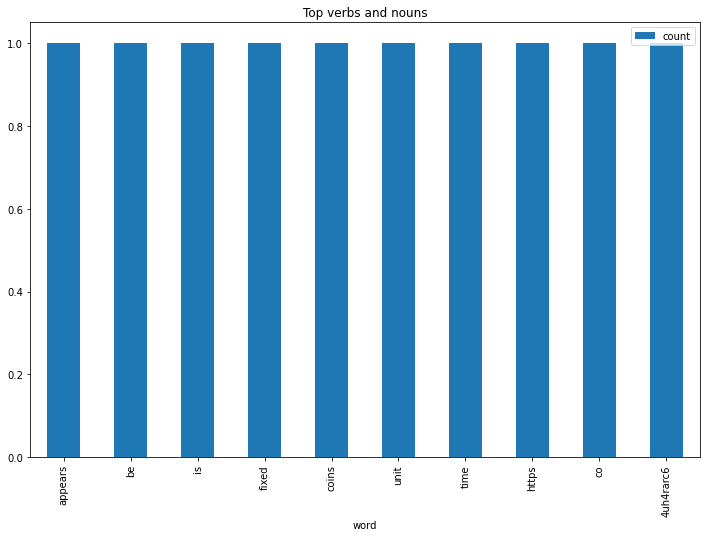

In [28]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

## Emotion Mining

In [29]:
#Sentiment analysis
affin = pd.read_csv('C:/Users/Admin/Documents/data science assignment/Text mining/Afinn.csv', sep=',', encoding='latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [30]:
affin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [33]:
import nltk
nltk.download('punkt')
from nltk import tokenize

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
data=pd.read_csv("/Users/Admin/Documents/data science assignment/Text mining/Elon_musk.csv",encoding='unicode_escape',error_bad_lines=False) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
import nltk

from nltk.tokenize import sent_tokenize
sentences = tokenize.sent_tokenize(" ".join(data.Text))
sentences[0:30] 

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [36]:
sent_df = pd.DataFrame(sentences, columns=['Text'])
sent_df

,Text
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


In [37]:
affinity_scores = affin.set_index('word')['value'].to_dict() 

In [38]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [39]:
calculate_sentiment(text = 'amazing') 

4

In [40]:
sent_df['sentiment_value'] = sent_df['Text'].apply(calculate_sentiment)

In [41]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['Text'].str.split().apply(len)
sent_df['word_count'].head(10) 

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [42]:
sent_df 

,Text,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [43]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,Text,sentiment_value,word_count
183,Theres some great AI out ther https://t.co/v...,10,48
224,"@PPathole @karpathy For a second there, I thou...",11,69
817,Might be able to https://t.co/FB7e5nOq2E @Pri...,11,72
184,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
719,We just havent observed the https://t.co/mez...,15,72
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [44]:
sent_df['sentiment_value'].describe() 

count    924.000000
mean       1.352814
std        2.671421
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [45]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head() 

,Text,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
8,Tweets definitely do not represent real-world ...,0,8


In [46]:
sent_df[sent_df['sentiment_value']>=18].head() 

,Text,sentiment_value,word_count


In [47]:
sent_df['index']=range(0,len(sent_df)) 

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

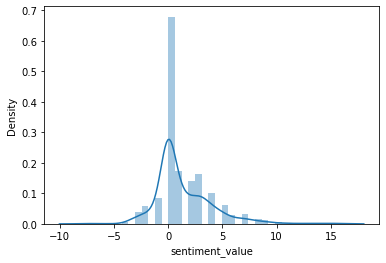

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

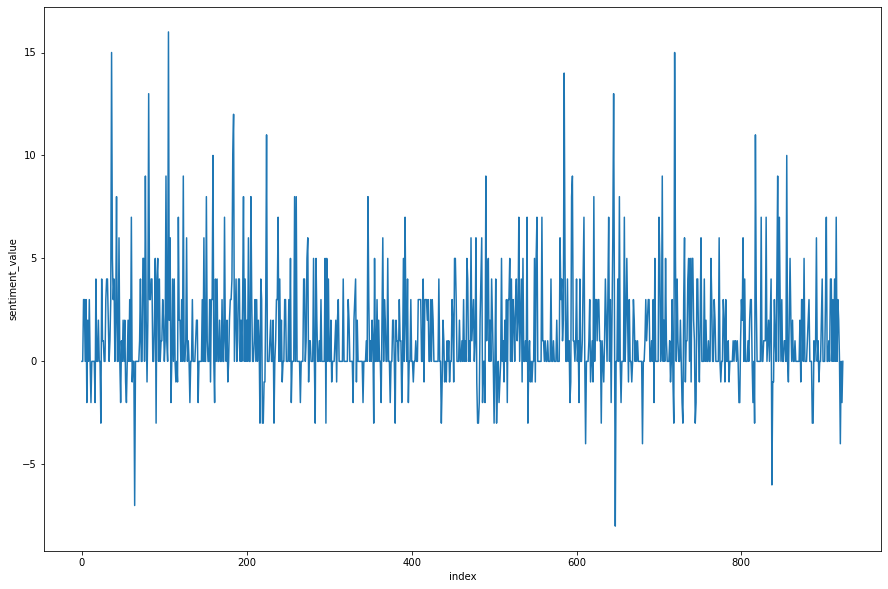

In [49]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

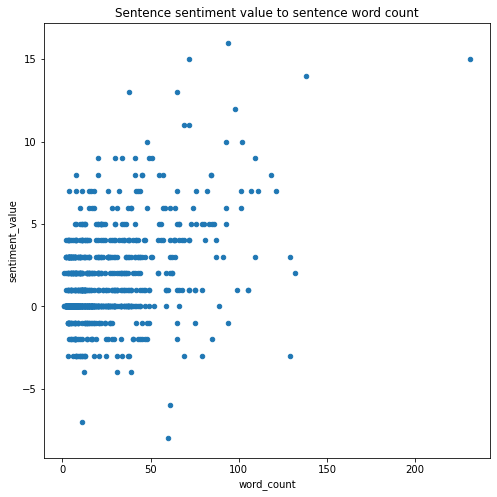

In [50]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')